In [1]:
from glob import glob
from csv import reader, writer
from scipy.io.wavfile import read
import parselmouth
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import numpy as np
from tqdm import tqdm
import pickle
import gc
import os
import random
from skimage.transform import resize
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway

In [4]:
# load the re-labeled data

txtfile = 'Figure-S1/pre-tap_vowel_durations.csv'
with open(txtfile, 'r') as f:
    csvread = reader(f, delimiter=',')
    speclist = [line for line in csvread]

pre_dxt_dur = [1000*float(entry[-1]) for entry in speclist if entry[3]=='dx_t']
pre_dxd_dur = [1000*float(entry[-1]) for entry in speclist if entry[3]=='dx_d']

In [5]:
##### Vowel Stats ######
print("###### DUR STATS ######")
F, p = f_oneway(*[pre_dxt_dur, pre_dxd_dur])
print('F: ', F)
print('p: ', p)
groups = ['dxt' for x in pre_dxt_dur] + ['dxd' for x in pre_dxd_dur]
endog = pre_dxt_dur + pre_dxd_dur
tuk = pairwise_tukeyhsd(endog=endog, groups=groups, alpha=0.05)
print(tuk)

###### DUR STATS ######
F:  50.156221484911754
p:  2.313511452355763e-12
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
   dxd    dxt -18.3057 0.001 -23.3764 -13.2349   True
-----------------------------------------------------


<Figure size 432x288 with 0 Axes>

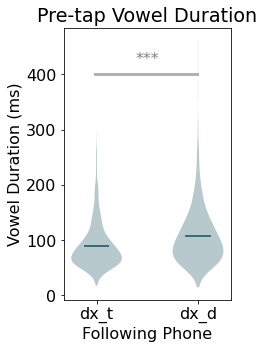

<Figure size 432x288 with 0 Axes>

In [6]:
#134f5cff
fig, ax = plt.subplots(figsize=(3,5))
vp = ax.violinplot([pre_dxt_dur, pre_dxd_dur], showmeans=True, showextrema=False)
for pc in vp['bodies']:
    pc.set_facecolor('#134f5cff')
pc = vp['cmeans']
pc.set_edgecolor('#134f5cff')
ax.axhline(400, xmin=1.5/8, xmax=6.4/8, c='grey', lw=3, alpha=.6)
plt.text(1.5, 415, "***", ha='center', va='bottom', color='grey')
ax.set_xticks(range(1,3))
ax.set_xticklabels(['dx_t','dx_d'])
ax.set_ylabel('Vowel Duration (ms)')
ax.set_xlabel('Following Phone')
ax.set_title('Pre-tap Vowel Duration')
plt.figure()

In [8]:
txtfile = 'Figure-S1/all_t_d_dxd_dxt_specs.pkl'
with open(txtfile, 'rb') as f:
    speclist = pickle.load(f)

In [9]:
t = [entry[3] for entry in speclist if entry[1]=='t']
d = [entry[3] for entry in speclist if entry[1]=='d']
dxt = [entry[3] for entry in speclist if entry[1]=='dx_t']
dxd = [entry[3] for entry in speclist if entry[1]=='dx_d']

In [10]:
taps = dxt + dxd
hf = int(len(taps)/2)
random.shuffle(taps)
rand_dxt = taps[:hf]
rand_dxd = taps[hf:]

In [12]:
t_dur = [1000*entry[4] for entry in speclist if entry[1]=='t']
d_dur = [1000*entry[4] for entry in speclist if entry[1]=='d']
dxt_dur = [1000*entry[4] for entry in speclist if entry[1]=='dx_t']
dxd_dur = [1000*entry[4] for entry in speclist if entry[1]=='dx_d']

In [16]:
t_lens = [len(np.transpose(ti)) for ti in t]
d_lens = [len(np.transpose(di)) for di in d]
dxt_lens = [len(np.transpose(dxti)) for dxti in dxt]
dxd_lens = [len(np.transpose(dxdi)) for dxdi in dxd]

rand_dxt_lens = ([len(np.transpose(dxti)) for dxti in rand_dxt])
rand_dxd_lens = ([len(np.transpose(dxdi)) for dxdi in rand_dxd])

In [13]:
##### Stats ######
print("###### DUR STATS ######")
F, p = f_oneway(*[t_dur, d_dur,dxt_dur,dxd_dur])
print('F: ', F)
print('p: ', p)
groups = ['t' for x in t_dur] + ['d' for x in d_dur] +['dxt' for x in dxt_dur] +['dxd' for x in dxd_dur]
endog = t_dur + d_dur + dxt_dur + dxd_dur
tuk = pairwise_tukeyhsd(endog=endog, groups=groups, alpha=0.05)
print(tuk)

###### DUR STATS ######
F:  107.74503339742574
p:  9.600443120342906e-64
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     d    dxd -32.0808 0.001 -42.2132 -21.9484   True
     d    dxt -32.3154 0.001  -39.218 -25.4128   True
     d      t   8.4018 0.001   3.6335  13.1701   True
   dxd    dxt  -0.2346   0.9 -11.3471  10.8779  False
   dxd      t  40.4826 0.001  30.5539  50.4113   True
   dxt      t  40.7172 0.001  34.1172  47.3171   True
-----------------------------------------------------


<Figure size 432x288 with 0 Axes>

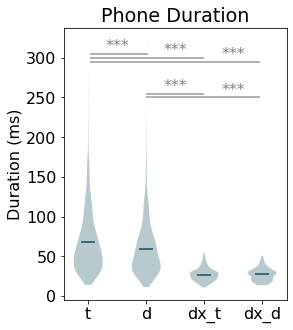

<Figure size 432x288 with 0 Axes>

In [14]:
#134f5cff
fig, ax = plt.subplots(figsize=(4,5))
vp = ax.violinplot([t_dur,d_dur,dxt_dur,dxd_dur], showmeans=True, showextrema=False)
for pc in vp['bodies']:
    pc.set_facecolor('#134f5cff')
pc = vp['cmeans']
pc.set_edgecolor('#134f5cff')
ax.axhline(305, xmin=1/8, xmax=3/8, c='grey', lw=2, alpha=.6)
ax.axhline(300, xmin=1/8, xmax=5/8, c='grey', lw=2, alpha=.6)
ax.axhline(295, xmin=1/8, xmax=7/8, c='grey', lw=2, alpha=.6)
ax.axhline(255, xmin=3/8, xmax=5/8, c='grey', lw=2, alpha=.6)
ax.axhline(250, xmin=3/8, xmax=7/8, c='grey', lw=2, alpha=.6)

plt.text(1.5, 305, "***", ha='center', va='bottom', color='grey')
plt.text(2.5, 300, "***", ha='center', va='bottom', color='grey')
plt.text(3.5, 295, "***", ha='center', va='bottom', color='grey')
plt.text(2.5, 255, "***", ha='center', va='bottom', color='grey')
plt.text(3.5, 250, "***", ha='center', va='bottom', color='grey')

ax.set_xticks(range(1,5))
ax.set_xticklabels(['t','d','dx_t','dx_d'])
ax.set_ylabel('Duration (ms)')
ax.set_title('Phone Duration')
plt.figure()

In [17]:
t_dxt_median_len = np.median(t_lens+dxt_lens)
d_dxt_median_len = np.median(d_lens+dxt_lens)
dxt_dxd_median_len = np.median(dxt_lens+dxd_lens)

rand_median_len = np.median(rand_dxt_lens+rand_dxd_lens)

In [18]:
warped_ts = [resize(ti,(185,t_dxt_median_len), anti_aliasing=True) for ti in t]
warped_ds = [resize(di,(185,d_dxt_median_len), anti_aliasing=True) for di in d]
t_warped_dxts = [resize(dxti,(185,t_dxt_median_len), anti_aliasing=True) for dxti in dxt]
d_warped_dxts = [resize(dxti,(185,d_dxt_median_len), anti_aliasing=True) for dxti in dxt]
dxd_warped_dxts = [resize(dxti,(185,dxt_dxd_median_len), anti_aliasing=True) for dxti in dxt]
warped_dxds = [resize(dxdi,(185,dxt_dxd_median_len), anti_aliasing=True) for dxdi in dxd]

warped_rand_dxd = [resize(dxdi,(185,rand_median_len), anti_aliasing=True) for dxdi in rand_dxd]
warped_rand_dxt = [resize(dxti,(185,rand_median_len), anti_aliasing=True) for dxti in rand_dxt]

In [19]:
t_dxt_diffs = []
for ts in warped_ts:
    shape = np.shape(ts)[0]*np.shape(ts)[1]
    for dxts in t_warped_dxts:
        diff = np.sum(np.square(np.subtract(ts, dxts)))/shape
        t_dxt_diffs.append(diff)
        
d_dxt_diffs = []
for ds in warped_ds:
    shape = np.shape(ds)[0]*np.shape(ds)[1]
    for dxts in d_warped_dxts:
        diff = np.sum(np.square(np.subtract(ds, dxts)))/shape
        d_dxt_diffs.append(diff)
        
dxd_dxt_diffs = []
for dxds in warped_dxds:
    shape = np.shape(dxds)[0]*np.shape(dxds)[1]
    for dxts in dxd_warped_dxts:
        diff = np.sum(np.square(np.subtract(dxds, dxts)))/shape
        dxd_dxt_diffs.append(diff)
        
rand_diffs = []
for rand_dxd in warped_rand_dxd:
    shape = np.shape(rand_dxd)[0]*np.shape(rand_dxd)[1]
    for rand_dxt in warped_rand_dxt:
        diff = np.sum(np.square(np.subtract(rand_dxd, rand_dxt)))/shape
        rand_diffs.append(diff)

In [20]:
print("###### DIFF STATS ######")
F, p = f_oneway(*[t_dxt_diffs,d_dxt_diffs,dxd_dxt_diffs,rand_diffs])
print('F: ', F)
print('p: ', p)
groups = ['t' for x in t_dxt_diffs] + ['d' for x in d_dxt_diffs] + ['dxd' for x in dxd_dxt_diffs] + ['rand' for x in rand_diffs]
endog = t_dxt_diffs + d_dxt_diffs + dxd_dxt_diffs + rand_diffs
tuk = pairwise_tukeyhsd(endog=endog, groups=groups, alpha=0.05)
print(tuk)

###### DIFF STATS ######
F:  9042.898939289256
p:  0.0
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     d    dxd -98.6922  0.001 -102.8737 -94.5108   True
     d   rand -93.9397  0.001  -97.7433 -90.1361   True
     d      t  76.6574  0.001   74.6896  78.6252   True
   dxd   rand   4.7525 0.0905   -0.4804   9.9854  False
   dxd      t 175.3496  0.001  171.2522  179.447   True
  rand      t 170.5971  0.001  166.8862 174.3081   True
-------------------------------------------------------


<Figure size 432x288 with 0 Axes>

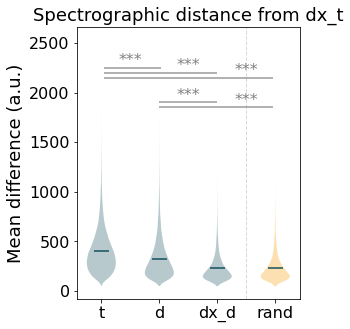

<Figure size 432x288 with 0 Axes>

In [21]:
fig, ax = plt.subplots(figsize = (4,5))
vp = ax.violinplot([t_dxt_diffs,d_dxt_diffs,dxd_dxt_diffs,rand_diffs], showmeans=True, showextrema=False)
for i, pc in enumerate(vp['bodies']):
    if i+1 < len(vp['bodies']):
        pc.set_facecolor('#134f5cff')
    else: pc.set_facecolor('#f79900ff')
        
pc = vp['cmeans']
pc.set_edgecolor('#134f5cff')

ax.axhline(2250, xmin=1/8, xmax=3/8, c='grey', lw=2, alpha=.6)
ax.axhline(2200, xmin=1/8, xmax=5/8, c='grey', lw=2, alpha=.6)
ax.axhline(2150, xmin=1/8, xmax=7/8, c='grey', lw=2, alpha=.6)

plt.text(1.5, 2250, "***", ha='center', va='bottom', color='grey')
plt.text(2.5, 2200, "***", ha='center', va='bottom', color='grey')
plt.text(3.5, 2150, "***", ha='center', va='bottom', color='grey')

ax.axhline(1900, xmin=3/8, xmax=5/8, c='grey', lw=2, alpha=.6)
ax.axhline(1850, xmin=3/8, xmax=7/8, c='grey', lw=2, alpha=.6)
plt.text(2.5, 1900, "***", ha='center', va='bottom', color='grey')
plt.text(3.5, 1850, "***", ha='center', va='bottom', color='grey')

ax.axvline(3.5, ymin=0, ymax=1, c='grey', ls="--",lw=1, alpha=.3)

ax.set_xticks(range(1,5))
ax.set_xticklabels(['t','d','dx_d','rand'])

plt.title('Spectrographic distance from dx_t', fontsize=18)
plt.ylabel('Mean difference (a.u.)', fontsize=18)

plt.figure()

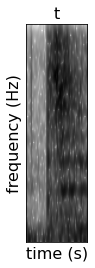

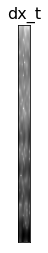

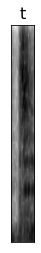

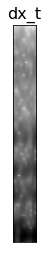

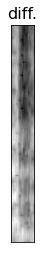

In [22]:
plt.imshow(t[2], cmap='gray_r', origin='lower')
plt.title('t', fontsize=16)
plt.xticks([])
plt.yticks([])
plt.xlabel("time (s)", fontsize=16)
plt.ylabel("frequency (Hz)", fontsize=16)
plt.show()

plt.imshow(dxt[2], cmap='gray_r', origin='lower')
plt.title('dx_t', fontsize=16)
plt.xticks([])
plt.yticks([])
plt.show()

plt.imshow(warped_ts[2], cmap='gray_r', origin='lower')
plt.title('t', fontsize=16)
plt.xticks([])
plt.yticks([])
plt.show()

plt.imshow(t_warped_dxts[2], cmap='gray_r', origin='lower')
plt.title('dx_t', fontsize=16)
plt.xticks([])
plt.yticks([])
plt.show()

plt.imshow(warped_ts[2] - t_warped_dxts[2], cmap='gray_r', origin='lower')
plt.title('diff.', fontsize=16)
plt.xticks([])
plt.yticks([])
plt.show()